In [32]:
import os

def sort_listdir(directory):
    def get_creation_time(item):
        item_path = os.path.join(directory, item)
        return os.path.getctime(item_path)

    items = os.listdir(directory)
    sorted_items = sorted(items, key=get_creation_time, reverse=True)
    return sorted_items

eventos_dir = os.path.abspath("")+"\\eventos\\"
graficos_dir = os.path.abspath("")+"\\graficos\\"
evento_name = """

estrategia_33_1000000_prob_100.json

"""
#_=[print(_) for _ in sort_listdir(eventos_dir)[:6]]
evento_list =[print(_) for _ in os.listdir(eventos_dir)]

evento_name = evento_name.replace("\n","")
evento_list

estrategia_11_1000000_prob_100.json
estrategia_11_100000_prob_100.json
estrategia_21_1000000_prob_100.json
estrategia_31_1000000_prob_100.json
estrategia_31_1000000_prob_75_100.json
estrategia_31_10000_prob_0_100.json
estrategia_32_1000000_prob_100.json
estrategia_32_1000000_prob_100_var1.json
estrategia_32_100000_prob_100.json
estrategia_33_1000000_prob_0.json
estrategia_33_1000000_prob_0_100.json
estrategia_33_1000000_prob_100.json
estrategia_33_1000000_prob_25_100.json
estrategia_33_1000000_prob_50_100.json
estrategia_33_1000000_prob_5_100.json
estrategia_33_1000000_prob_75_100.json
estrategia_33_10000_prob_0.json
newpos_estrategia_1_1000000_prob_100.json
newpos_estrategia_1_100000_prob_100.json
newpos_estrategia_21_1000000_prob_100.json
newpos_estrategia_31_1000000_prob_0_100.json
newpos_estrategia_31_1000000_prob_100.json
newpos_estrategia_31_1000000_prob_75_100.json
newpos_estrategia_31_1_prob_100.json
newpos_estrategia_32_1000000_prob_100.json
newpos_estrategia_32_1000000_prob_1

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [24]:
import sys, json 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FixedLocator, FixedFormatter


evento_path = eventos_dir+evento_name

if not os.path.isfile(evento_path):
    print(f"Evento {evento_name} no encontrado.")
    archivos = os.listdir(eventos_dir)
    if len(archivos) != 0:
        print("Existen los siguientes archivos en directorio eventos:")
        [print("\t- "+_) for _ in archivos]

    raise Exception("archivo no encontrado")

print(f"leyendo archivo {evento_name}")
with open(evento_path, 'r') as file: 
    
    fstring = json.load(file)
    secuencia = fstring["secuencia"]

    
    fstring.pop("secuencia")
    info = fstring
    
print(f"creando dataframe con {len(secuencia)} datos")

leyendo archivo estrategia_31_10000_prob_0_100.json
creando dataframe con 10001 datos


In [25]:
print("Información de json \n")
n_partidos = int([_ for _ in info["config"].split(",") if "max_partidos" in _][0].split(":")[1])

for llave,valor in info.items():
  print(f"{llave}: {valor}")
print(f"n_partidos: {n_partidos}")

Información de json 

info: 
config: estr_A:3,estr_B:1,prob_A:0,prob_B:100,max_pts:-1,max_partidos:10000,max_jugadas:-1,min_jugadas:-1,toggle_print:False
final: A:4 - B:9996 - pts_errados:0
tiempo_total: 0.07948858340581258
more_info: False
n_partidos: 10000


In [26]:
df = pd.DataFrame(secuencia)
df_pts = df[["time","pts_A","pts_B"]].drop_duplicates().reset_index().rename(columns={'index': 'indice'})
df_pts["diff"] = df_pts["pts_A"] - df_pts["pts_B"]

df_pts.columns
df_pts.head()

,indice,time,pts_A,pts_B,diff
0,0,1,1,0,1
1,1,3,2,0,2
2,2,5,3,0,3
3,3,7,4,0,4
4,4,11,4,1,3


In [27]:
m_A_list = []
m_B_list = []
m_diff_list = []

paso = 100

x_b,y_b = 0,0
for idx,(x,y) in enumerate(df_pts[["indice","pts_A"]].values):
  if idx%paso == 0 and idx != 0:
    m = (y-y_b)/(x-x_b)
    m_A_list.append(m)

x_b,y_b = 0,0
for idx,(x,y) in enumerate(df_pts[["indice","pts_B"]].values):
  if idx%paso == 0 and idx != 0:
    m = (y-y_b)/(x-x_b)
    m_B_list.append(m)

x_b,y_b = 0,0
for idx,(x,y) in enumerate(df_pts[["indice","diff"]].values):
  if idx%paso == 0 and idx != 0:
    m = (y-y_b)/(x-x_b)
    m_diff_list.append(m)

m_A = np.mean(m_A_list).round(3)
m_B = np.mean(m_B_list).round(3)

m_diff = np.mean(m_diff_list).round(3)

print(f"A:{m_A}\nB:{m_B}\nDiff:{m_diff}")

A:0.002
B:0.998
Diff:-0.996


graficando variable 1
graficando variable 2


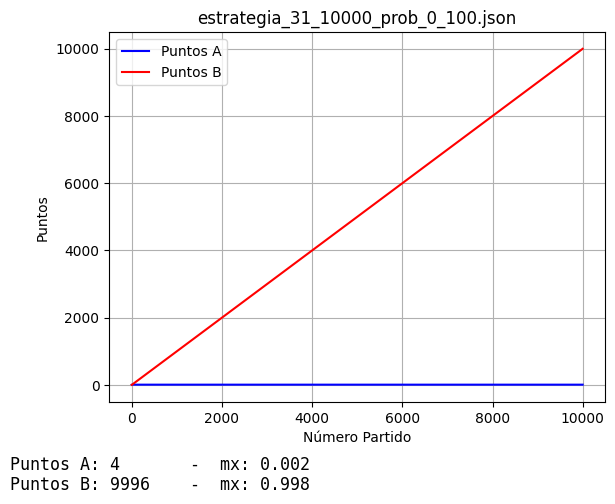

graficando diferencia


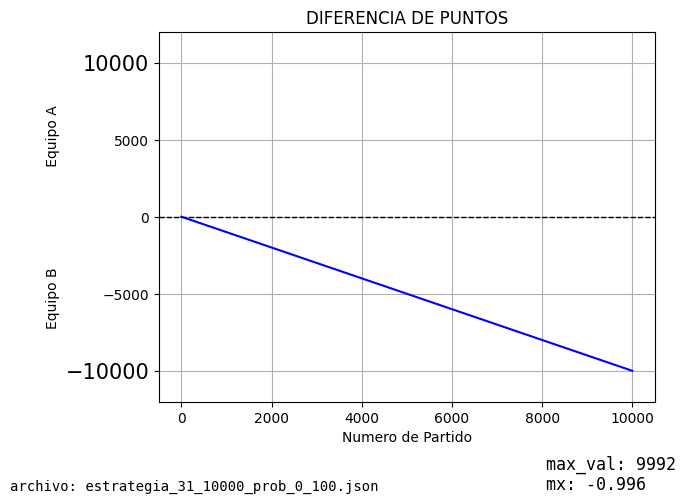

In [29]:
fig, ax1 = plt.subplots()
pts_A,pts_B,pts_err = info["final"].split(" - ")

print("graficando variable 1")
sns.lineplot(data=df_pts, x="indice", y="pts_A", label=f"Puntos A", color='blue', ax=ax1)

print("graficando variable 2")
sns.lineplot(data=df_pts, x="indice", y="pts_B", label=f"Puntos B", color='red', ax=ax1)
ax1.set_xlabel("Número Partido")
ax1.set_ylabel("Puntos")

ax1.set_title(f"{evento_name}")

ax1.xaxis.get_major_formatter().set_scientific(False)
ax1.yaxis.get_major_formatter().set_scientific(False)

ax1.text(-.2, -.25,  f'Puntos {pts_A.replace(":",": "): <10} -  mx: {m_A}\nPuntos {pts_B.replace(":",": "): <10} -  mx: {m_B}', ha='left', va='bottom', fontsize=12, transform=ax1.transAxes, fontfamily='monospace')

ax1.grid(True)
plt.show()

fig, ax1 = plt.subplots()
plt.margins()

print("graficando diferencia")
sns.lineplot(data=df_pts, x="indice", y="diff", color='blue', ax=ax1)

ax1.set_xlabel("Numero de Partido")
ax1.set_ylabel("Equipo B                       Equipo A")

max_val = np.max(np.abs(df_pts["diff"]))

ax1.axhline(0, color='black', linewidth=1, linestyle='--')
ax1.set_ylim(-max_val-max_val*0.2, max_val+max_val*0.2)

yticks = plt.gca().get_yticklabels()

yticks[:2][1].set_fontsize(15)
yticks[-2:][0].set_fontsize(15)

ax1.xaxis.get_major_formatter().set_scientific(False)
ax1.yaxis.get_major_formatter().set_scientific(False)

ax1.set_title(f"DIFERENCIA DE PUNTOS")
ax1.text(-.3, -.25, f'archivo: {evento_name}'             ,fontsize=10, fontfamily='monospace', ha='left', va='bottom', transform=ax1.transAxes)
ax1.text(0.78, -.25, f'max_val: {max_val}\nmx: {m_diff}'  ,fontsize=12, fontfamily='monospace', ha="left", va='bottom', transform=ax1.transAxes)
ax1.grid(True)

plt.show()